In [1]:
import yql
import numpy as np
import matplotlib.pyplot as plt
from business_models import hahn
import json
import pandas as pd
import datetime as dt

In [2]:
print('Reading dataset...')
reco = hahn.read('home/education/users/rbednarskiy/reco_attributes_values')    

Reading dataset...


In [3]:
reco_dup = reco
reco_dup.head()

,team_level,cnt,attribute_id,year,value_attribute_id,theme_name,week_num
0,NaN,12,difficulties_morpheme,2019,s_cheredovaniem_soglasnih,Чередование согласных в корне_5534,52
1,1.0,3,difficulties_morpheme,2020,s_cheredovaniem_soglasnih,Чередование согласных в корне_5534,14
2,1.0,78,difficulties_morpheme,2020,s_cheredovaniem_soglasnih,Чередование согласных в корне_5534,15
3,2.0,531,difficulties_morpheme,2020,s_cheredovaniem_soglasnih,Чередование согласных в корне_5534,7
4,2.0,237,difficulties_morpheme,2020,s_cheredovaniem_soglasnih,Чередование согласных в корне_5534,9


In [4]:
conditions = [reco_dup.theme_name.isin(['Тема текста_8757', 
                                   'Безударные гласные, проверяемые ударением_6666',  
                                   'Русский алфавит, или азбука_23952', 
                                   'Слог как минимальная произносительная единица_5465', 
                                   'Части речи_5404']),
             ~(reco_dup.theme_name.isin(['Тема текста_8757', 
                                   'Безударные гласные, проверяемые ударением_6666', 
                                   'Русский алфавит, или азбука_23952', 
                                   'Слог как минимальная произносительная единица_5465', 
                                   'Части речи_5404']))]

choices = ['top', 'random']
reco_dup['type'] = np.select(conditions, choices)

reco_dup['year_week'] = reco_dup['year'].astype(str) + '-' + reco_dup['week_num'].astype(str)
reco_dup.sort_values(['team_level','year_week'], ascending=True, inplace=True)

In [5]:
team_week = (reco_dup[['team_level', 'year_week']][~reco_dup['team_level'].isna()]
             .drop_duplicates()
             .sort_values(by=['team_level', 'year_week'])
             .reset_index(drop=True)
            )
team_week['week_order'] = list(range(1, len(team_week) + 1))


reco_dup = reco_dup.merge(team_week, on=['team_level', 'year_week'])

In [6]:
cols = ['theme_name', 'attribute_id', 'value_attribute_id', 'cnt', 'week_order']
data = (reco_dup[cols]
        .drop_duplicates()
        .reset_index(drop=True))


(data[['theme_name', 'attribute_id']]
 .drop_duplicates()
 .groupby(['theme_name'])
 ['attribute_id']
 .count()
 .reset_index()
)

,theme_name,attribute_id
0,"Безударные гласные, проверяемые ударением_6666",5
1,Итоговые задания по согласным звукам_31898,2
2,Развивающие задания_34649,2
3,Род глагола_8200,2
4,"Русский алфавит, или азбука_23952",5
5,Слог как минимальная произносительная единица_...,4
6,Сложные слова_5353,5
7,Тема текста_8757,4
8,Части речи_5404,6
9,Чередование согласных в корне_5534,3


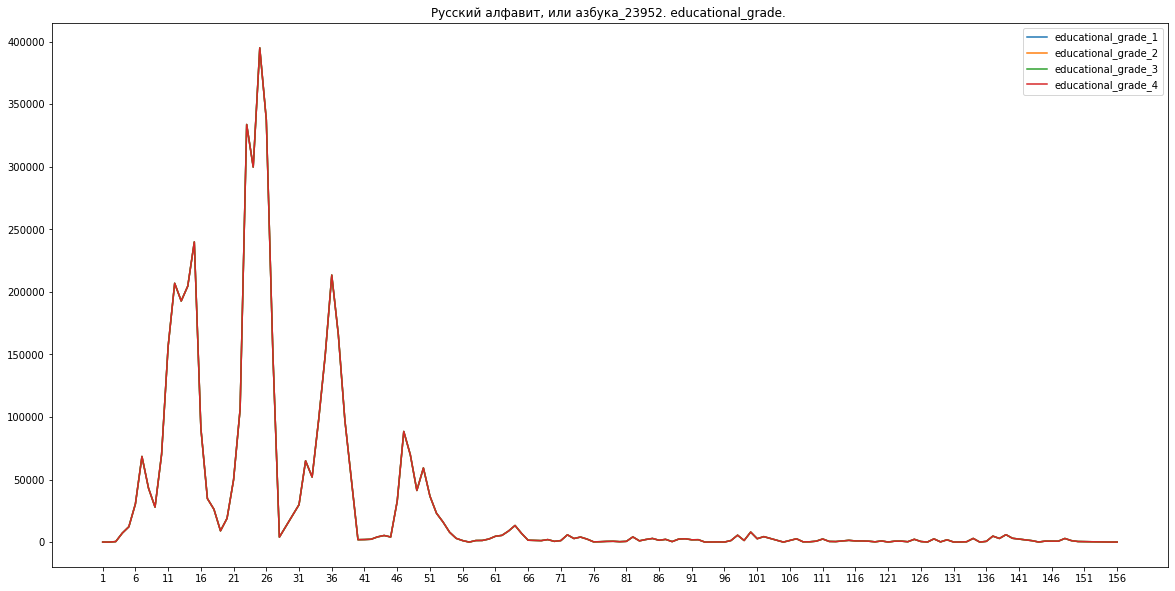

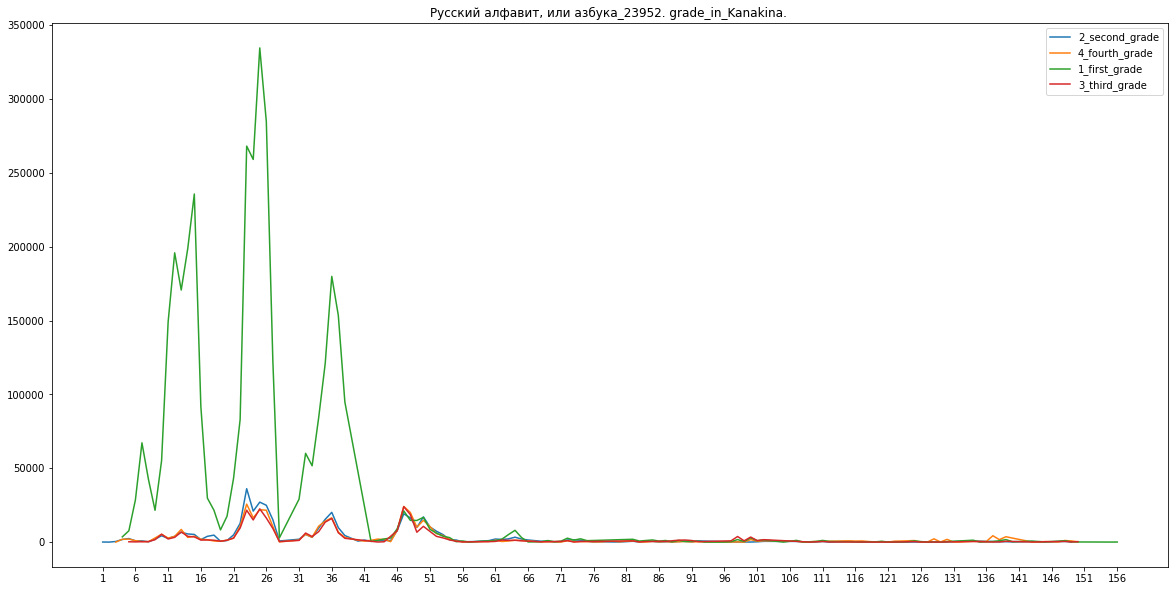

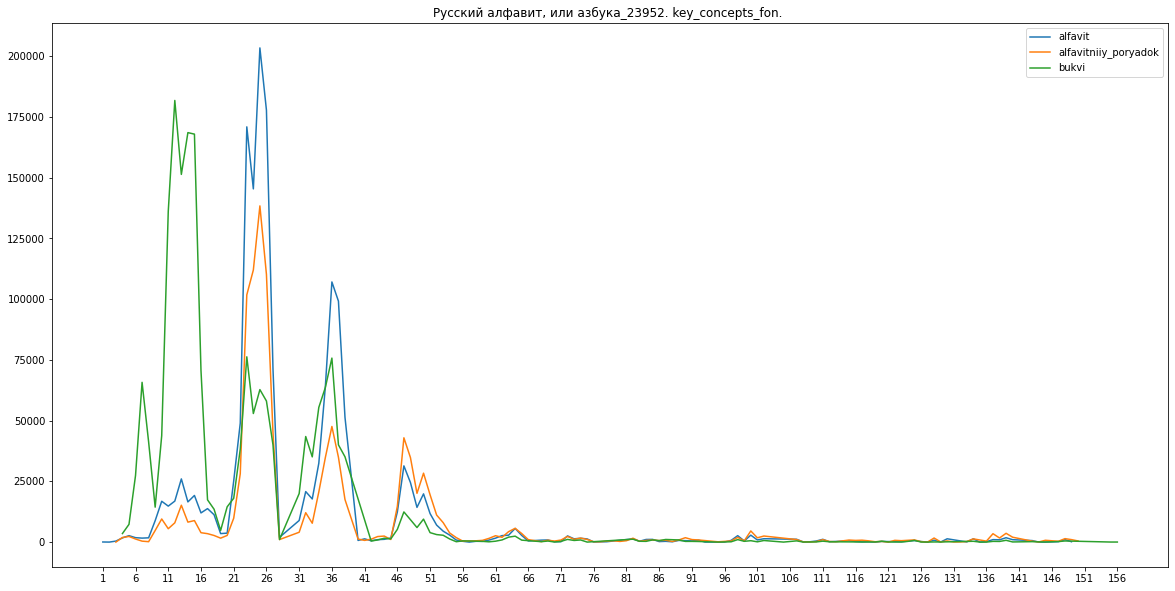

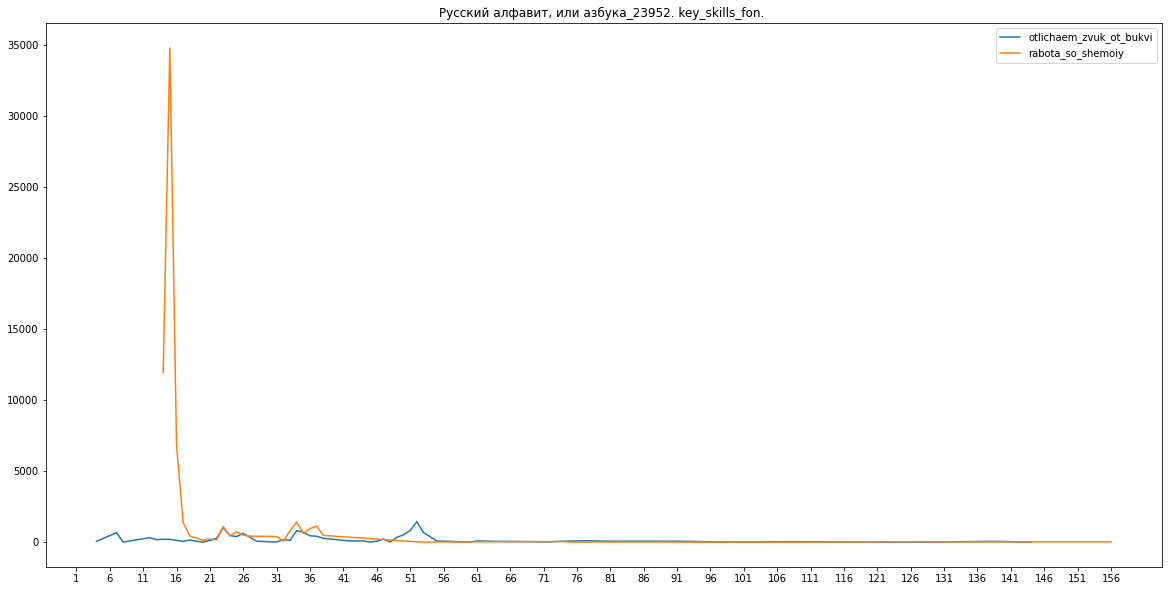

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

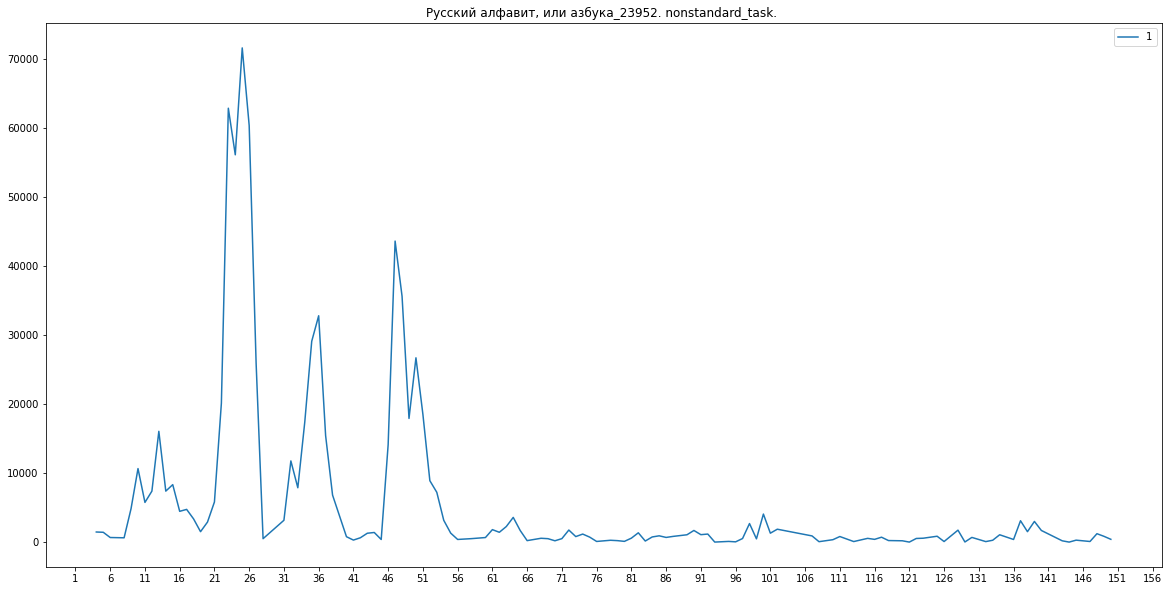

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

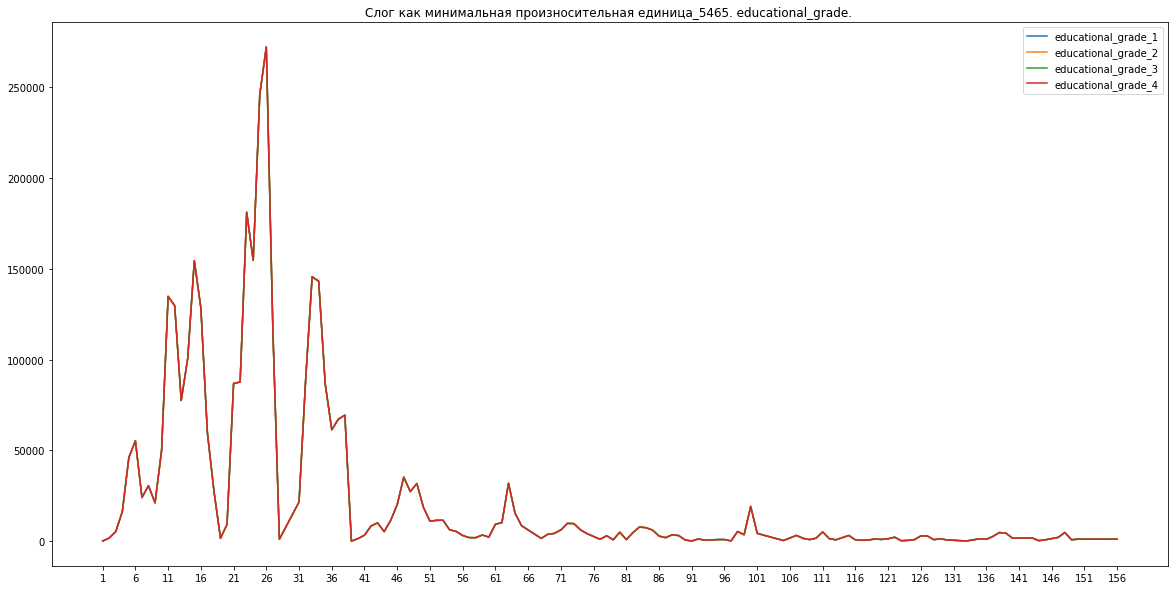

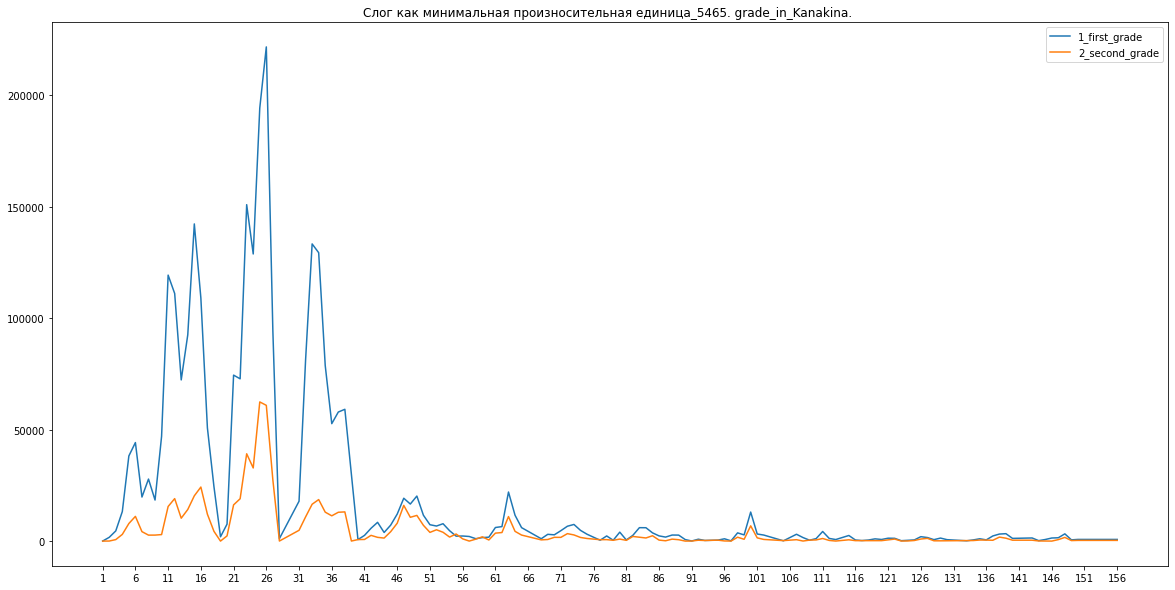

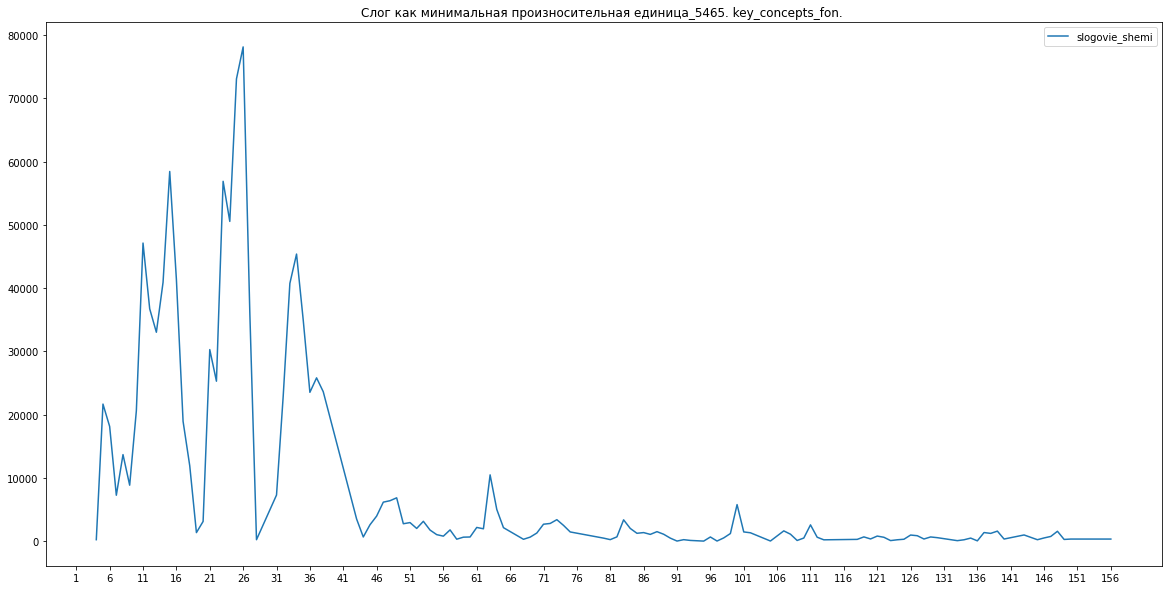

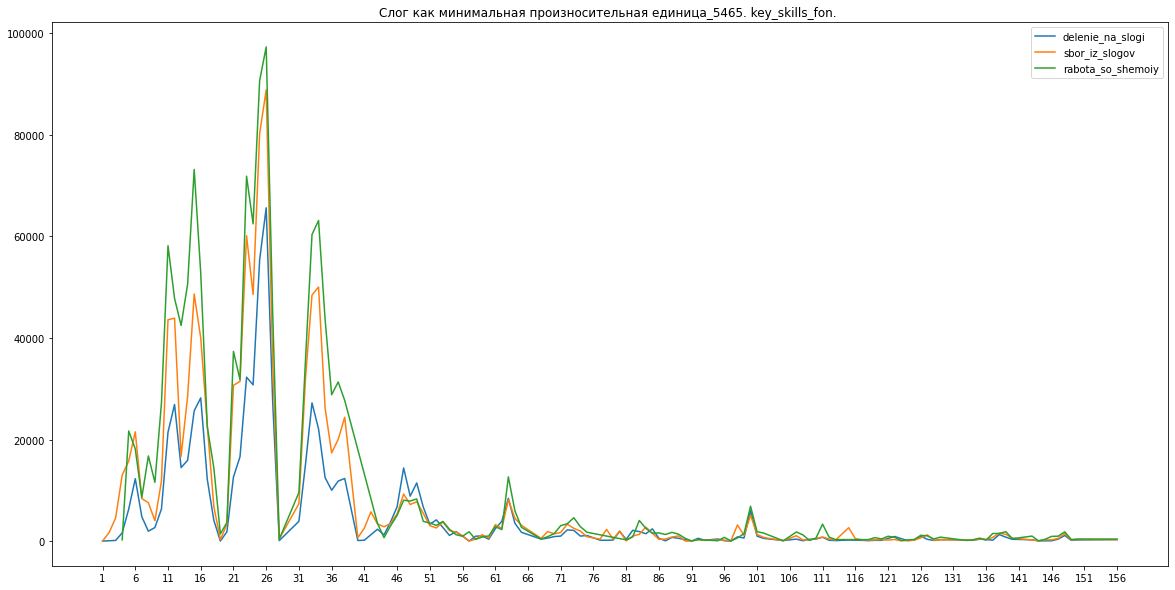

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

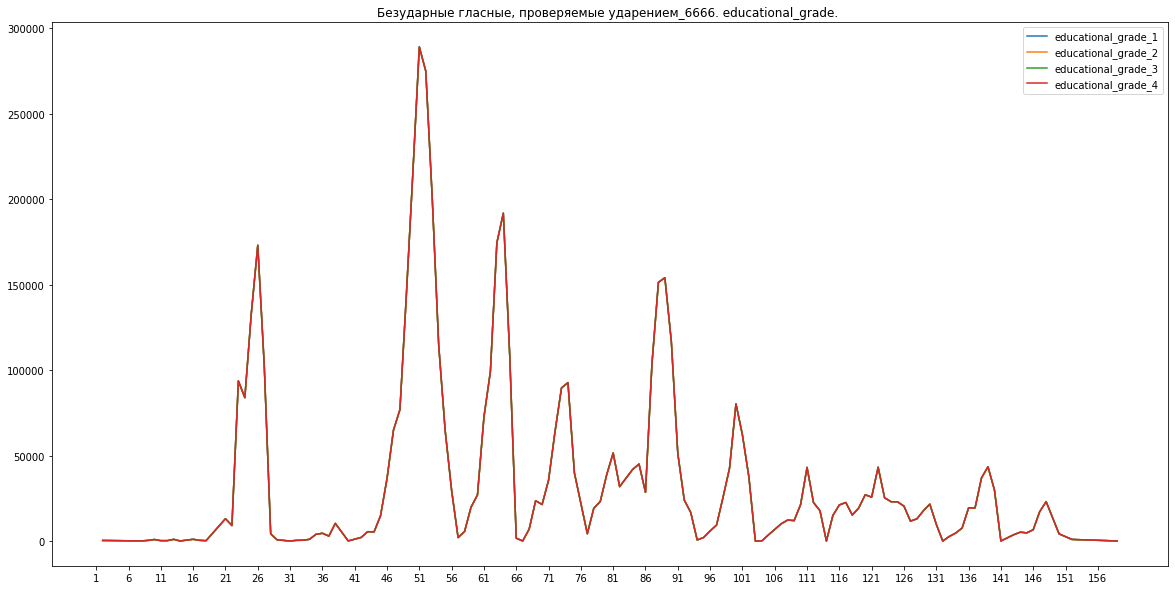

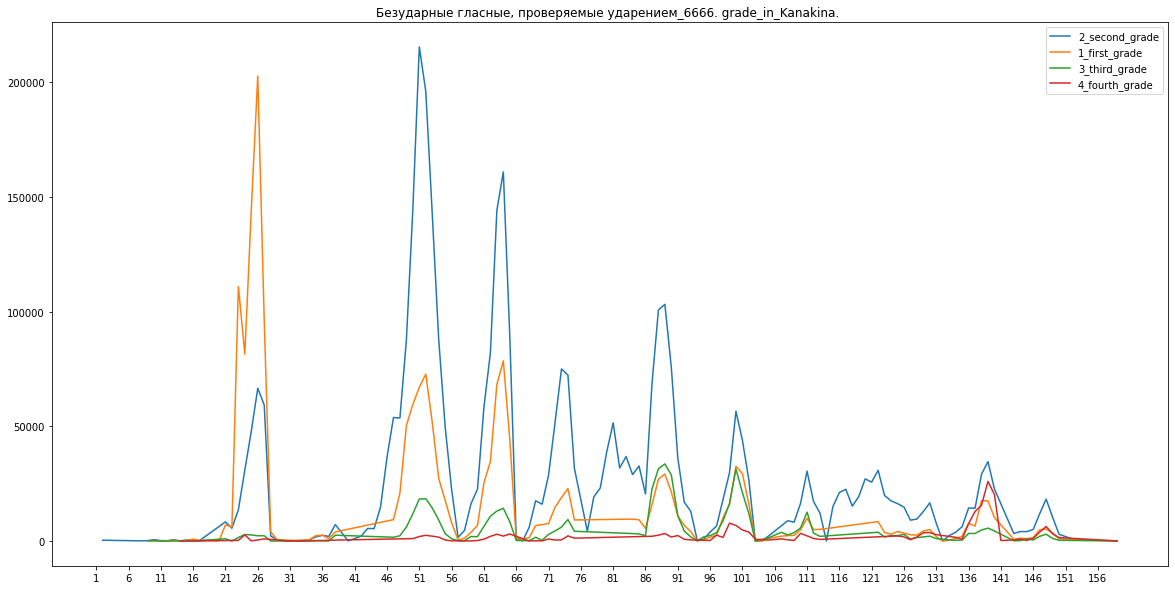

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

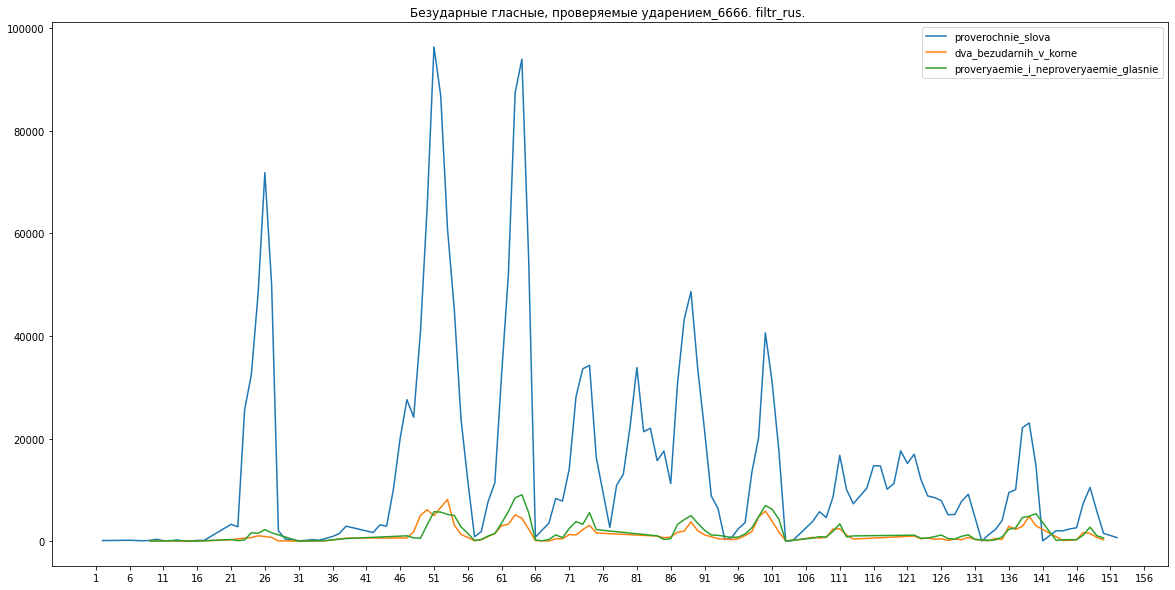

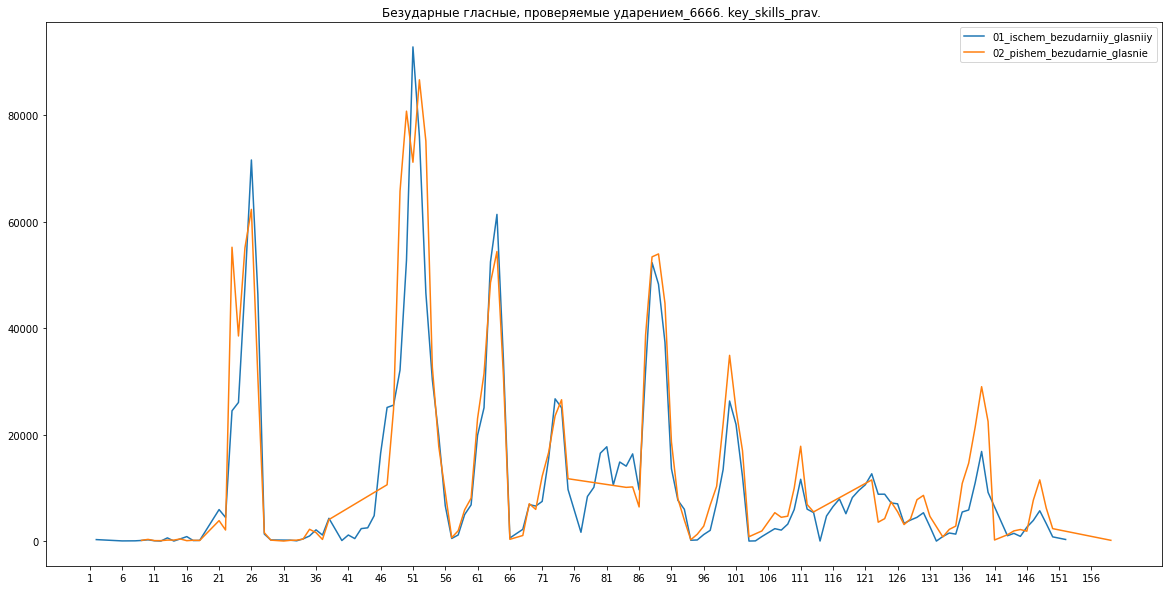

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

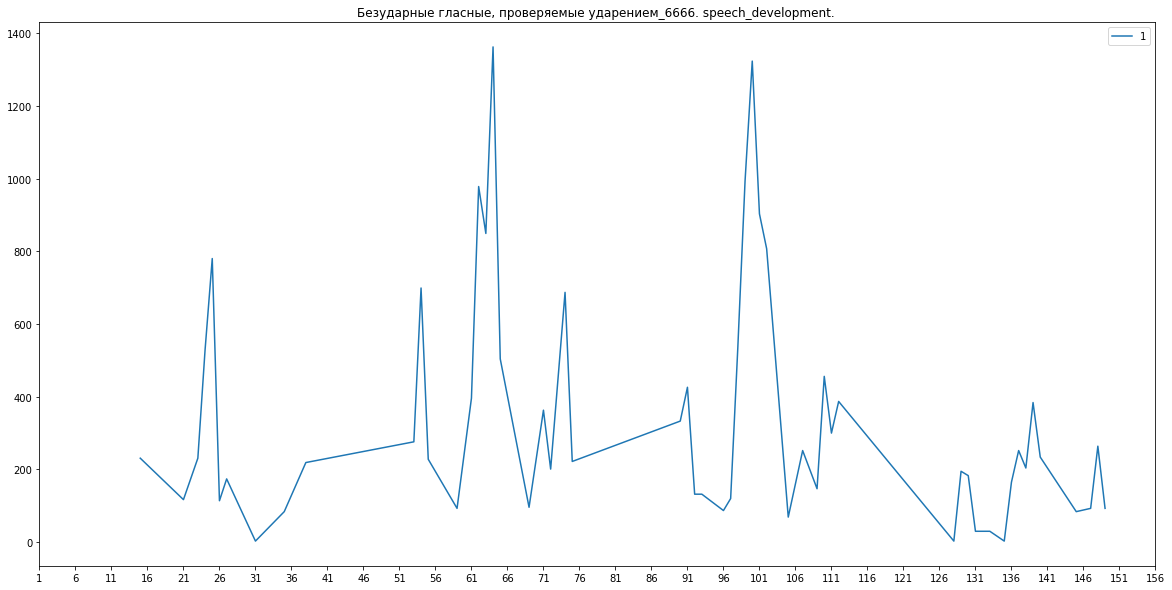

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

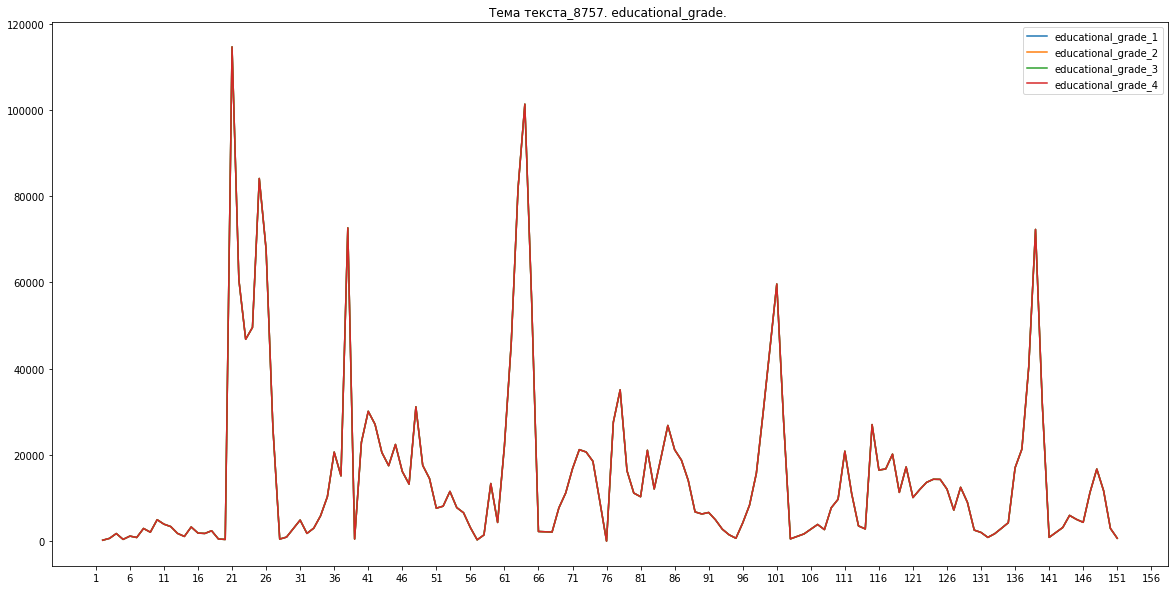

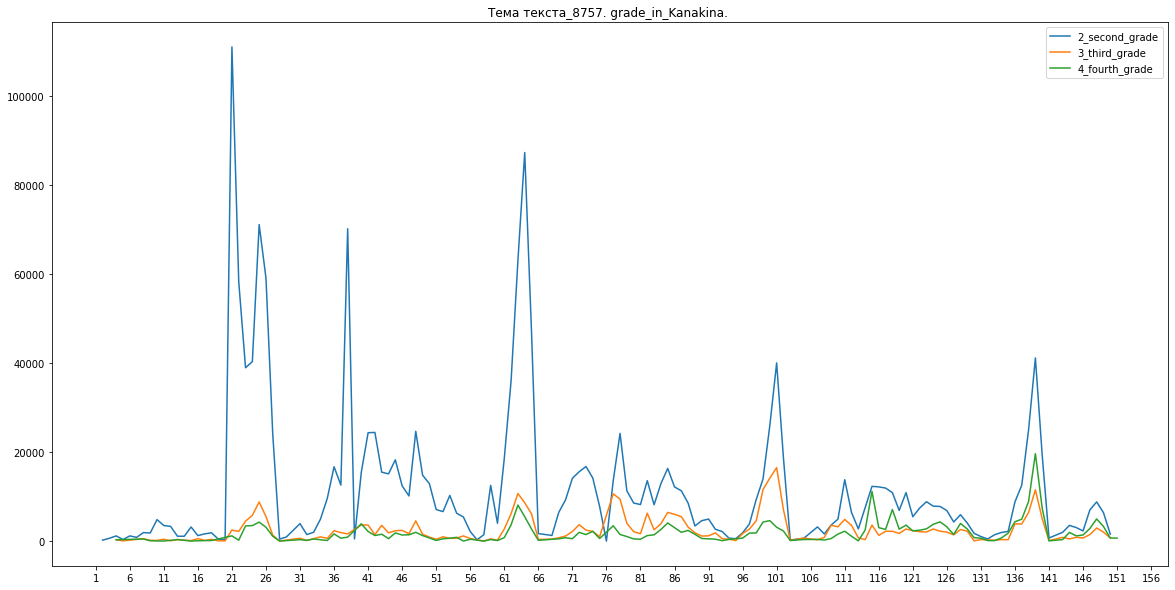

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

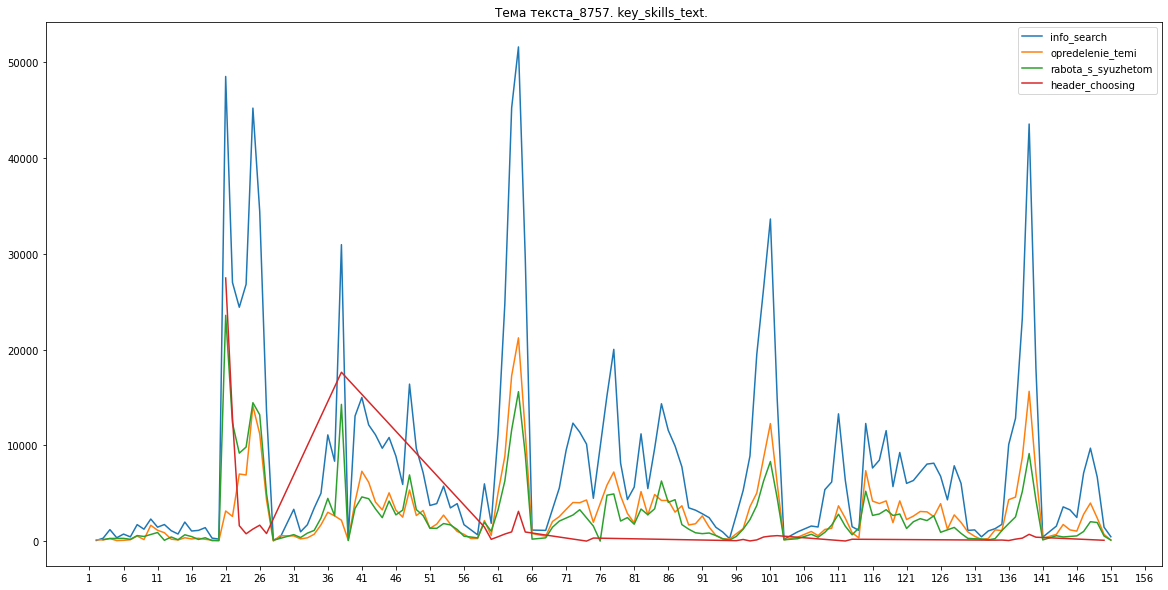

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

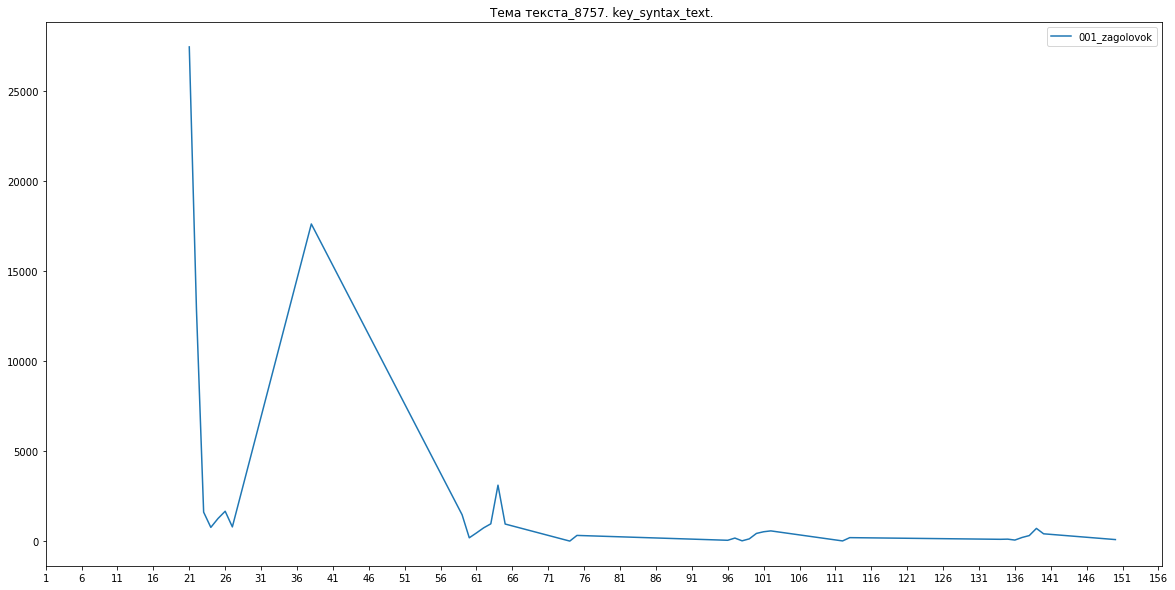

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

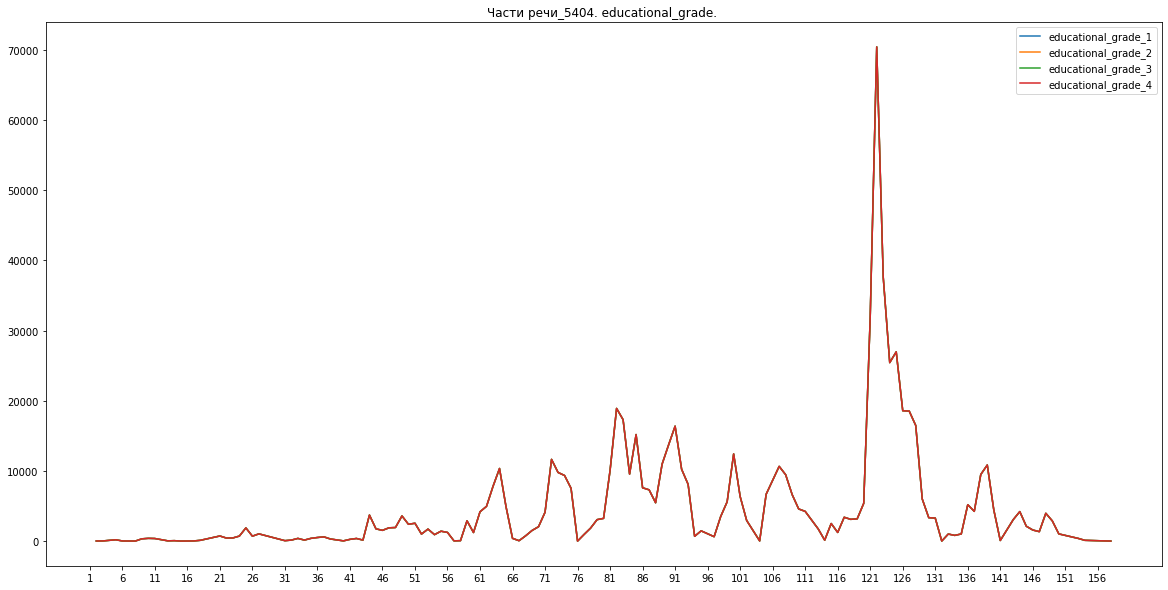

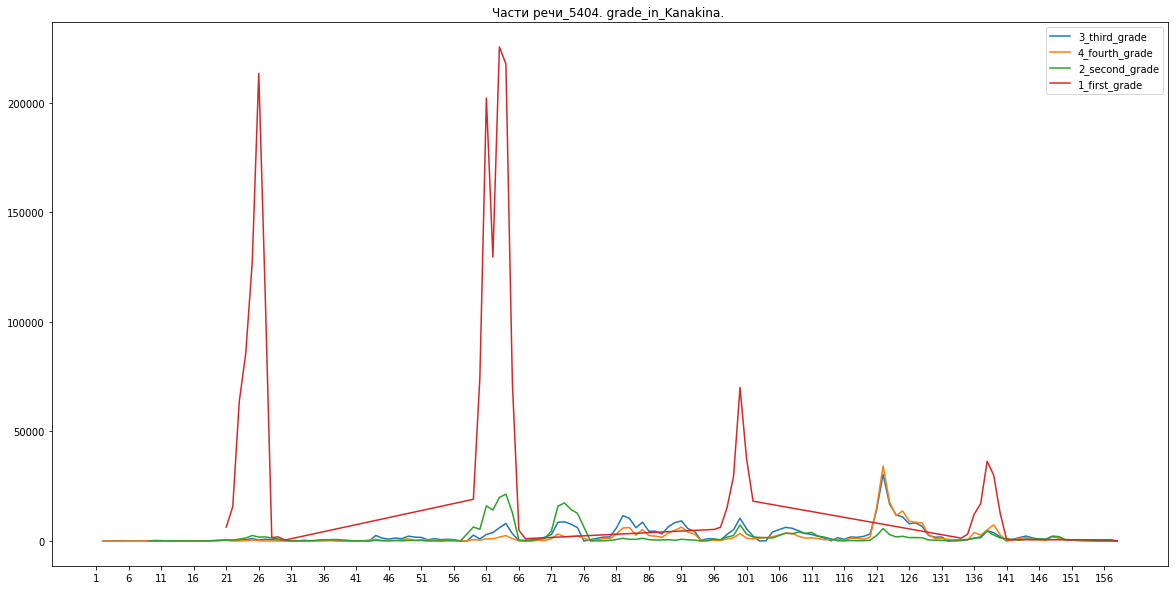

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

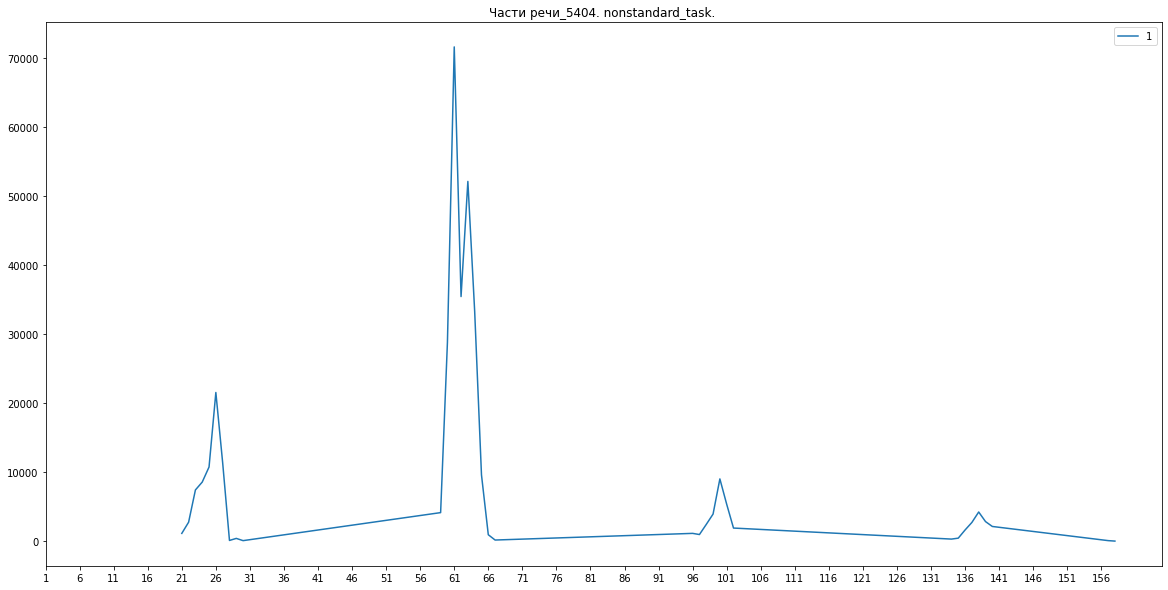

<Figure size 1440x720 with 0 Axes>

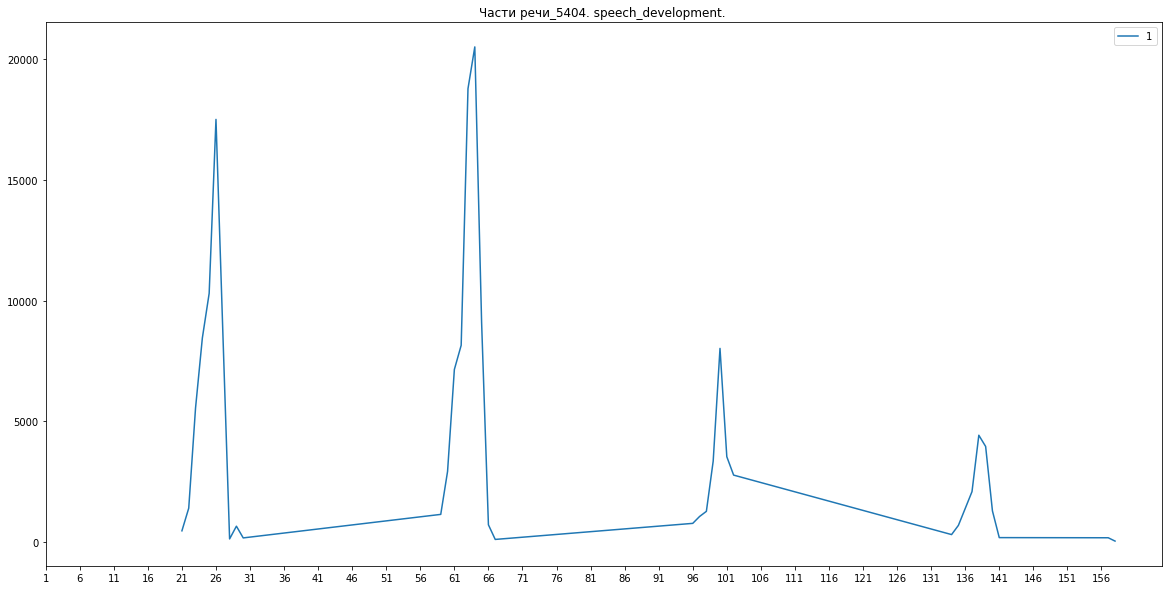

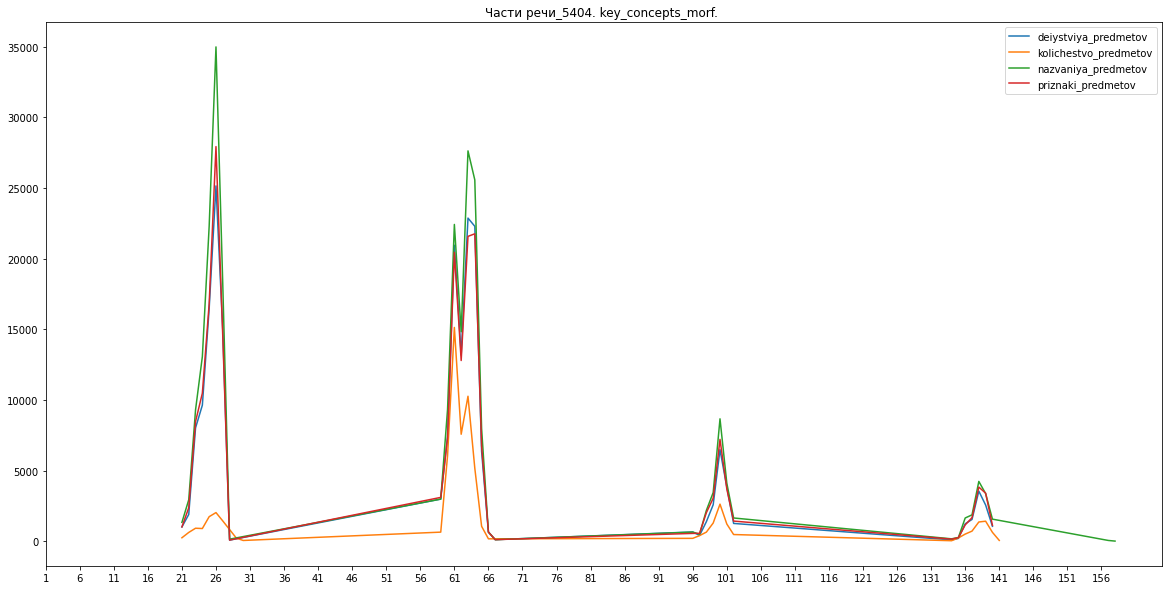

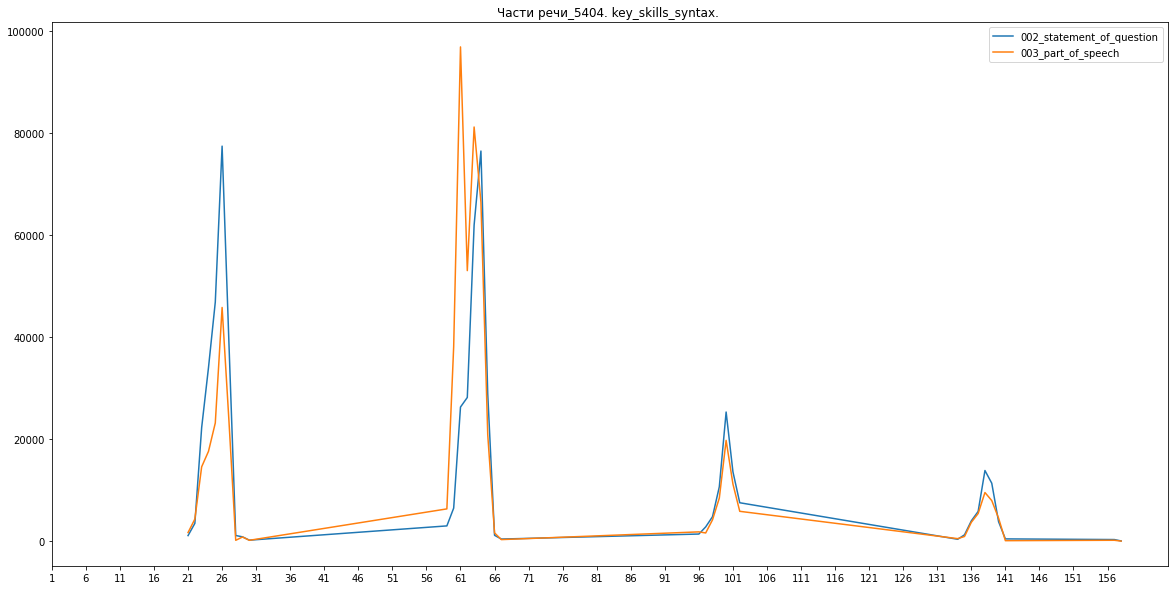

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

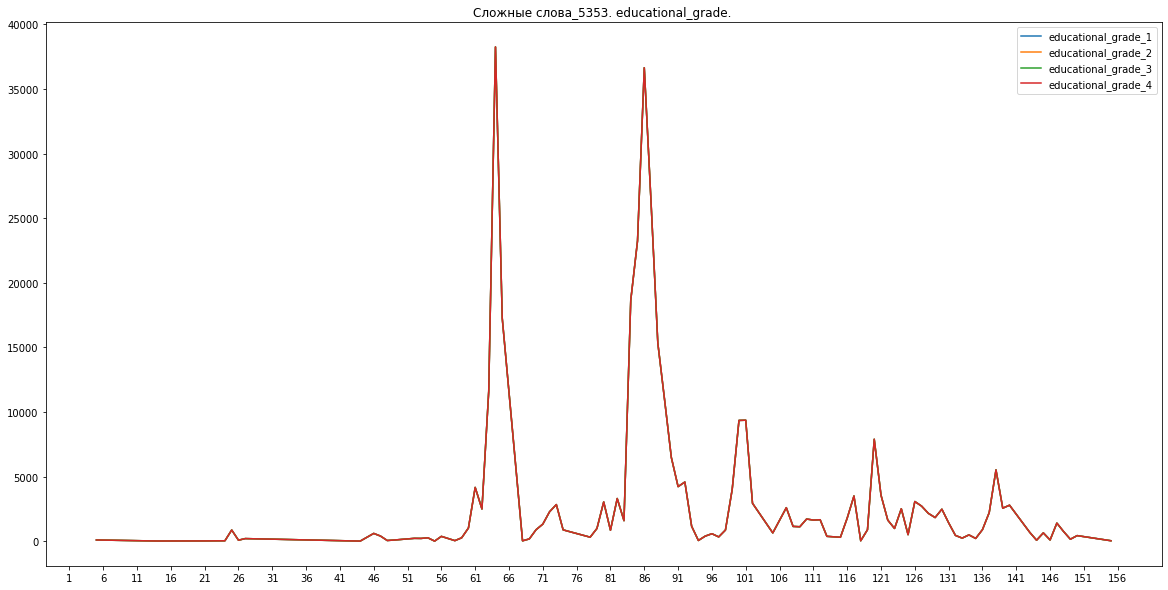

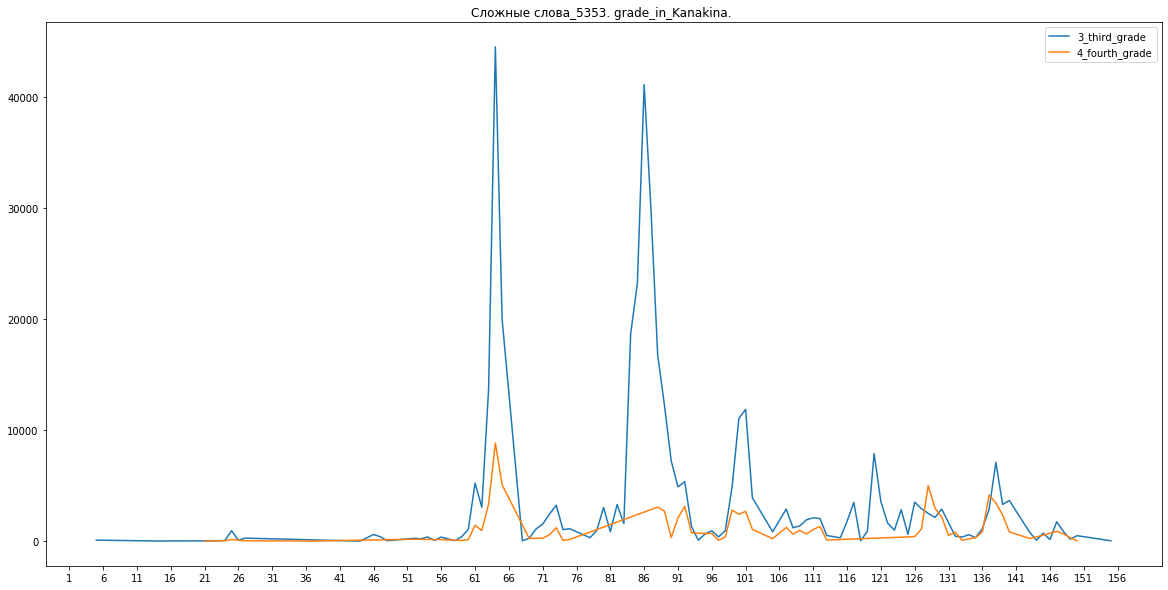

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

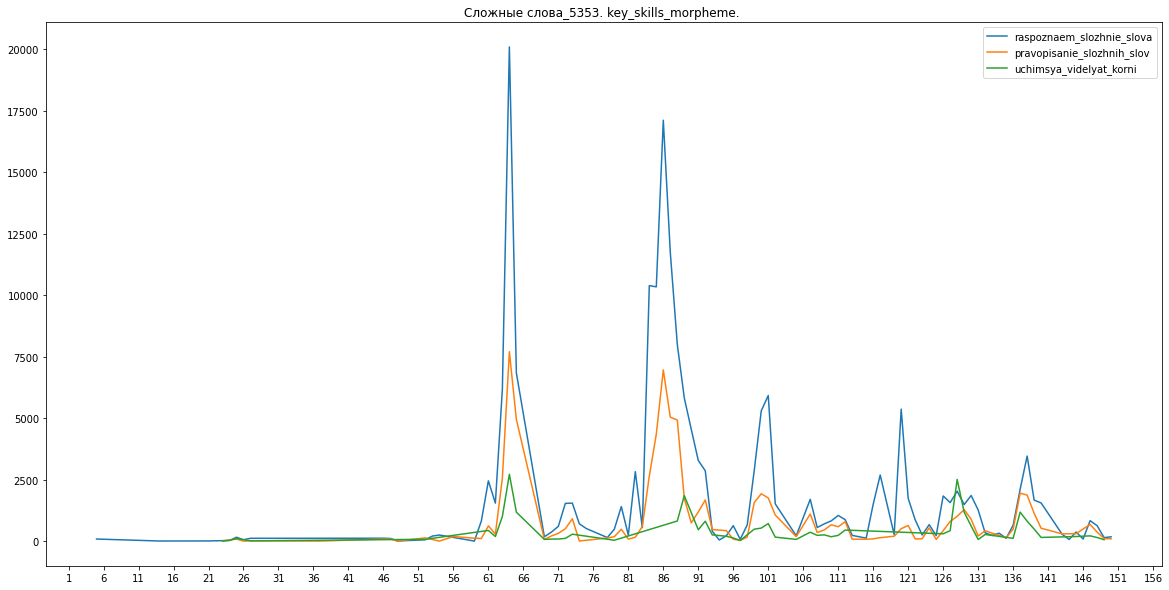

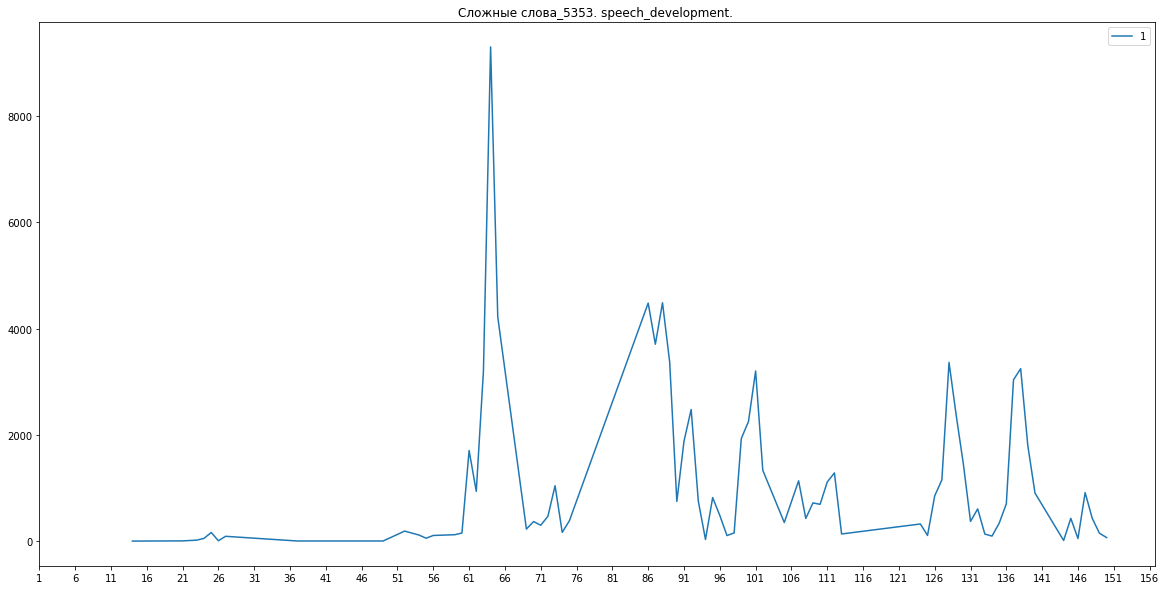

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

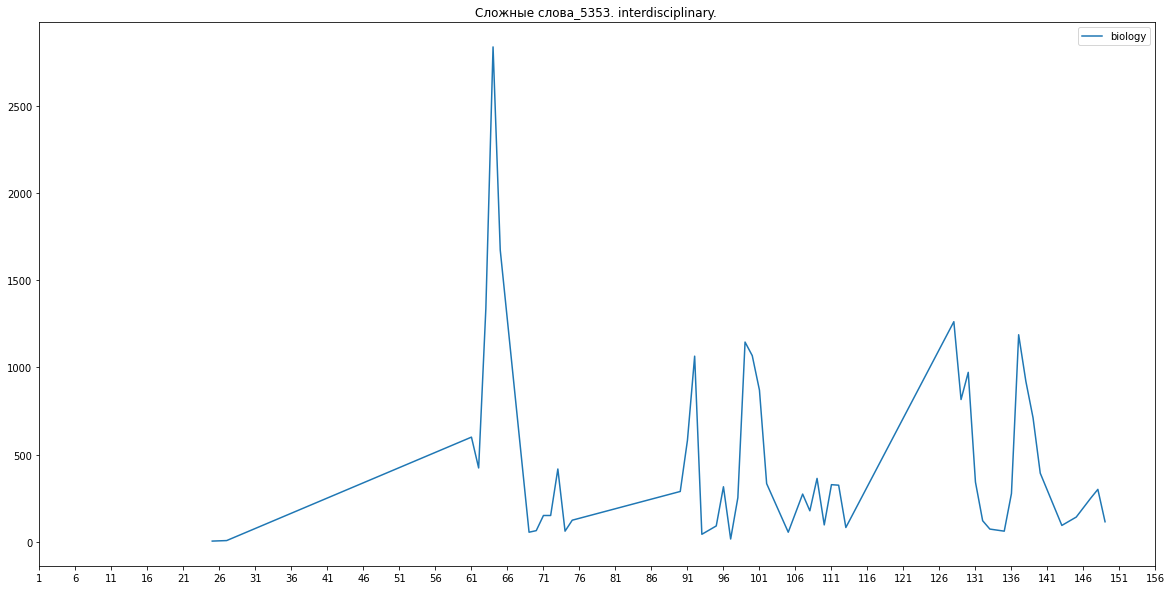

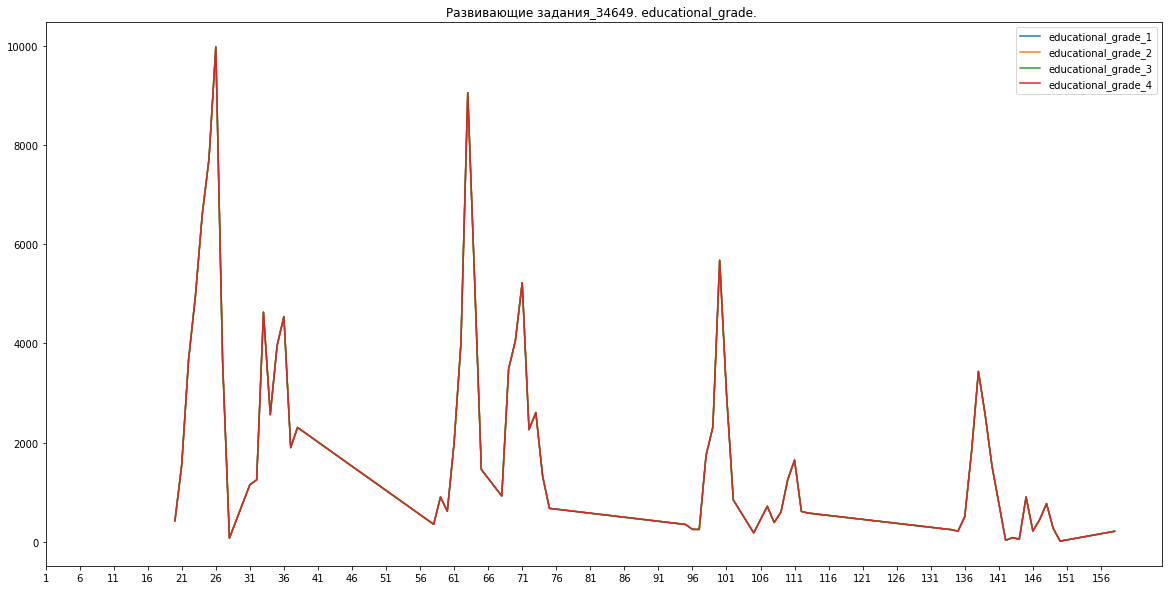

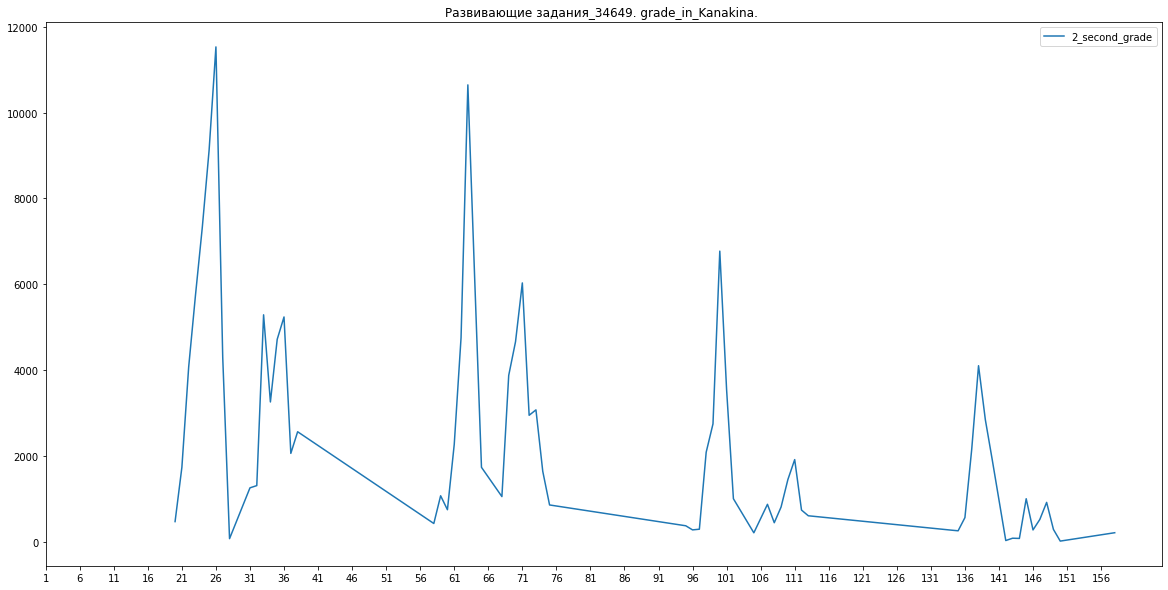

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

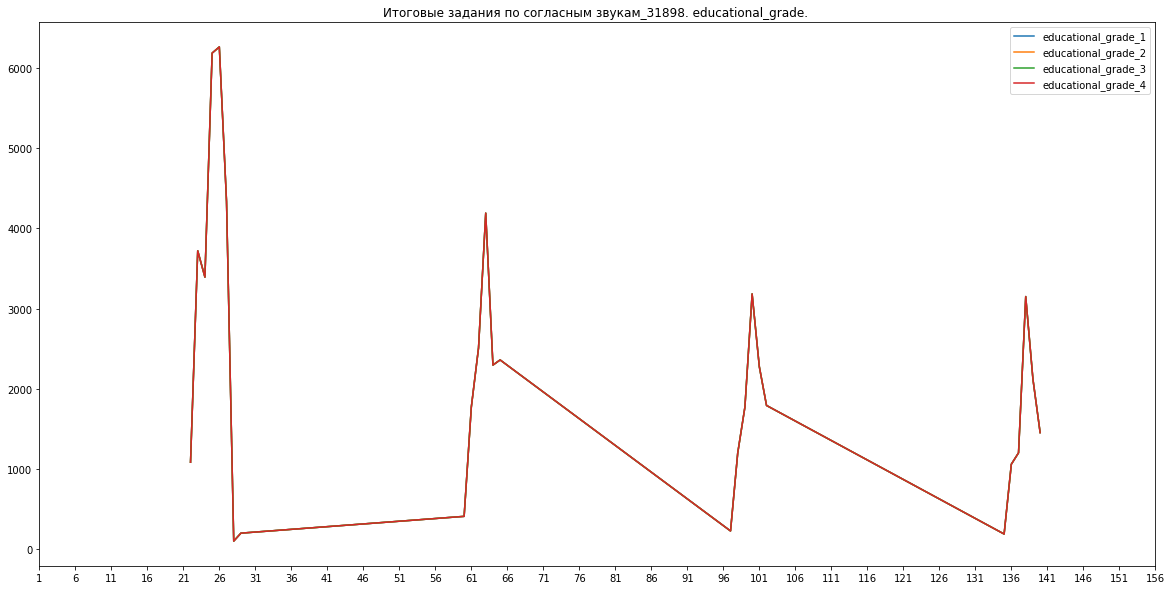

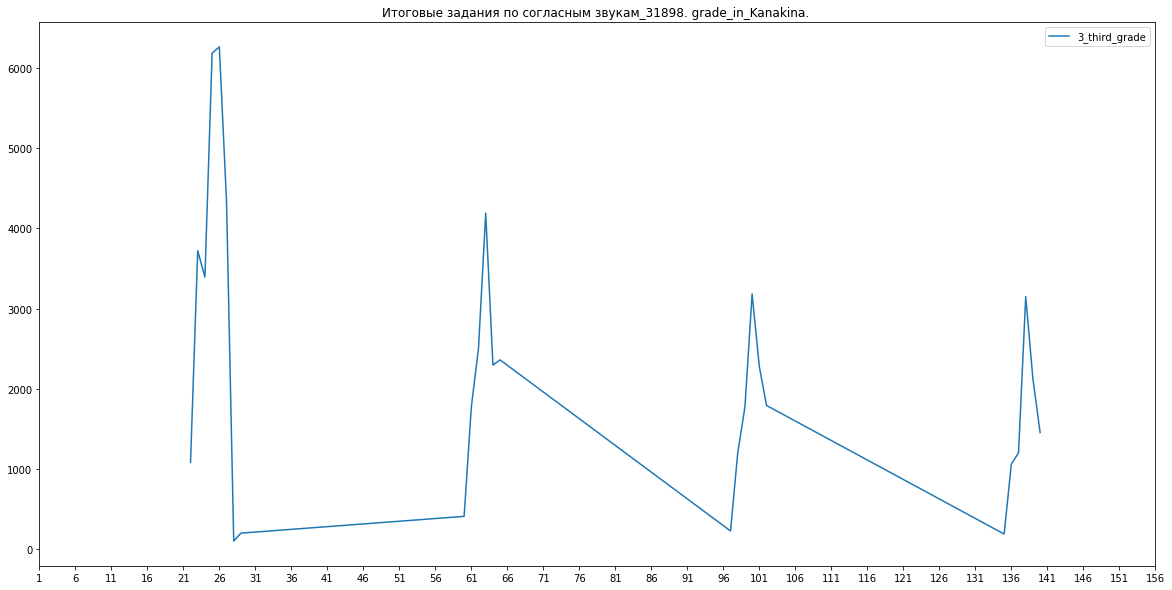

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

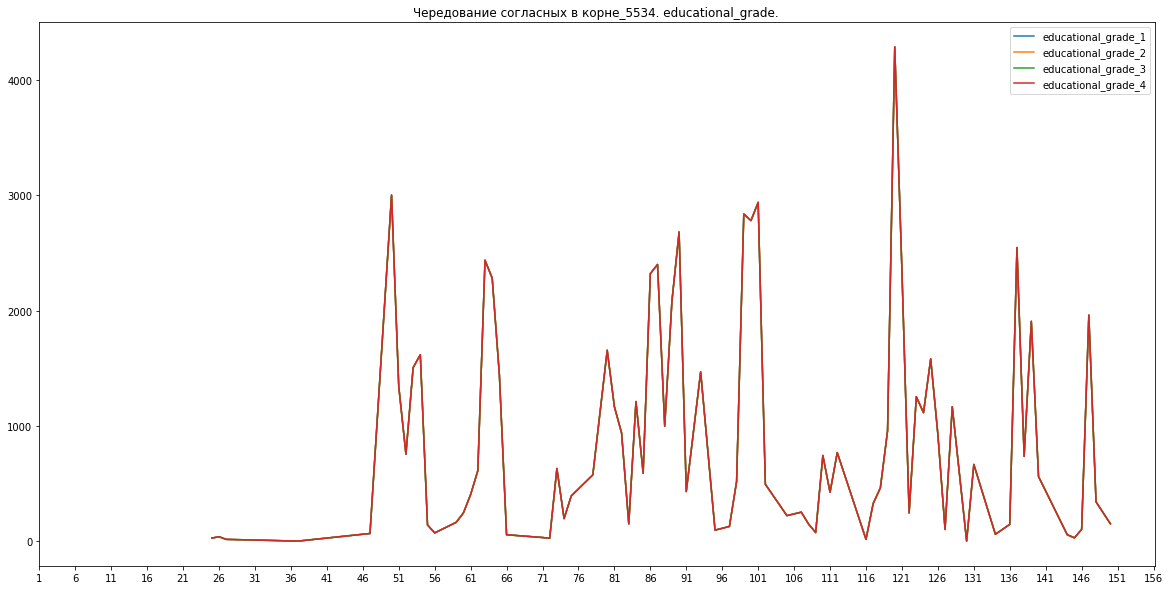

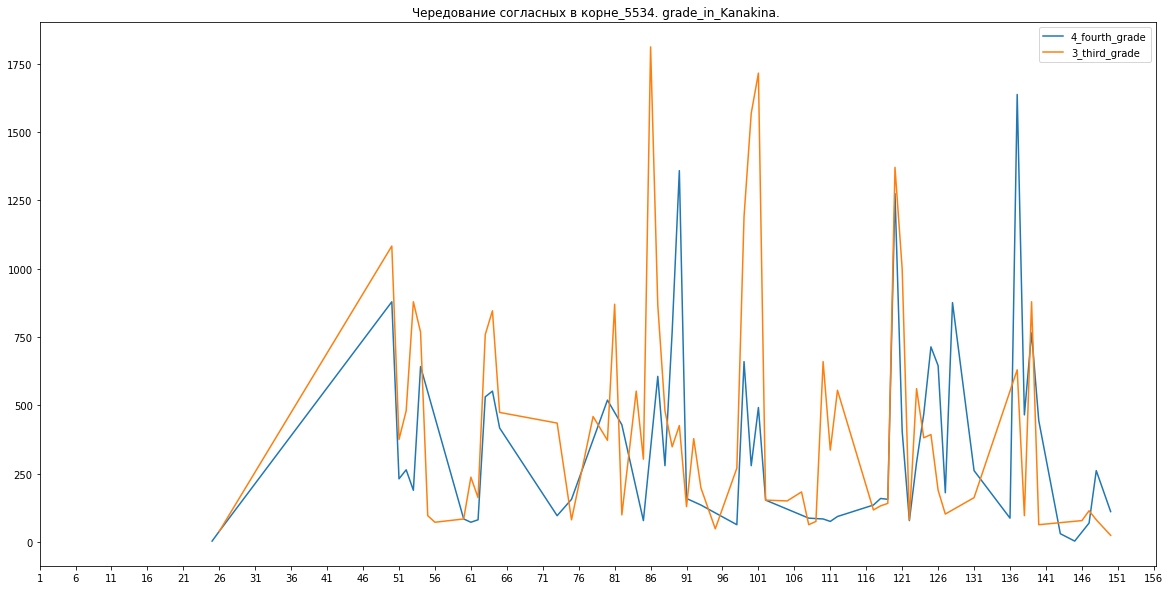

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

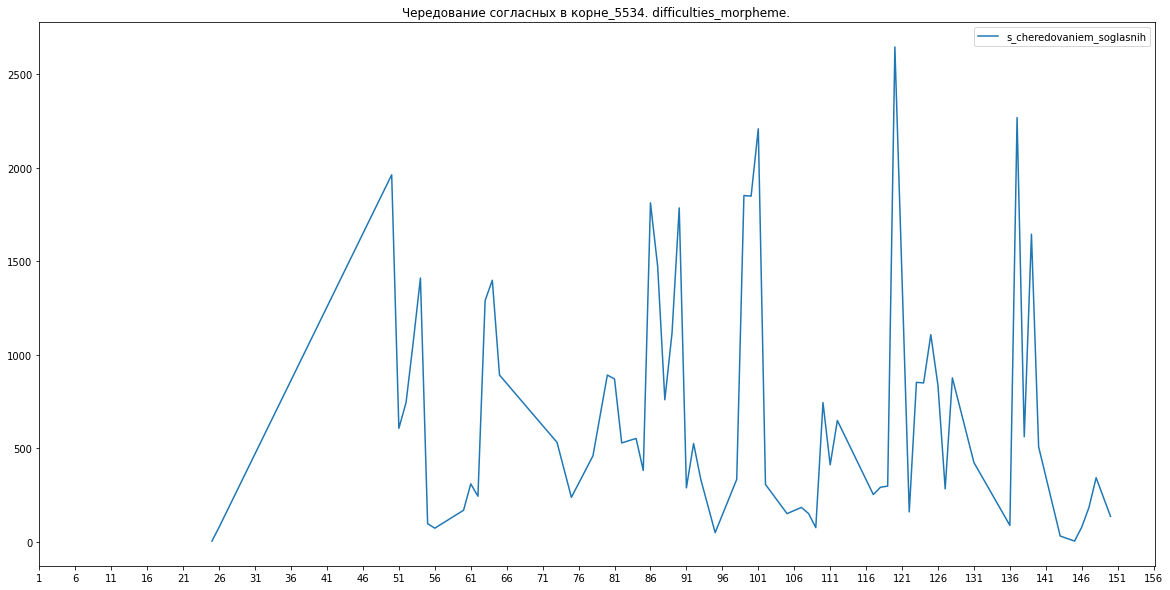

<Figure size 1440x720 with 0 Axes>

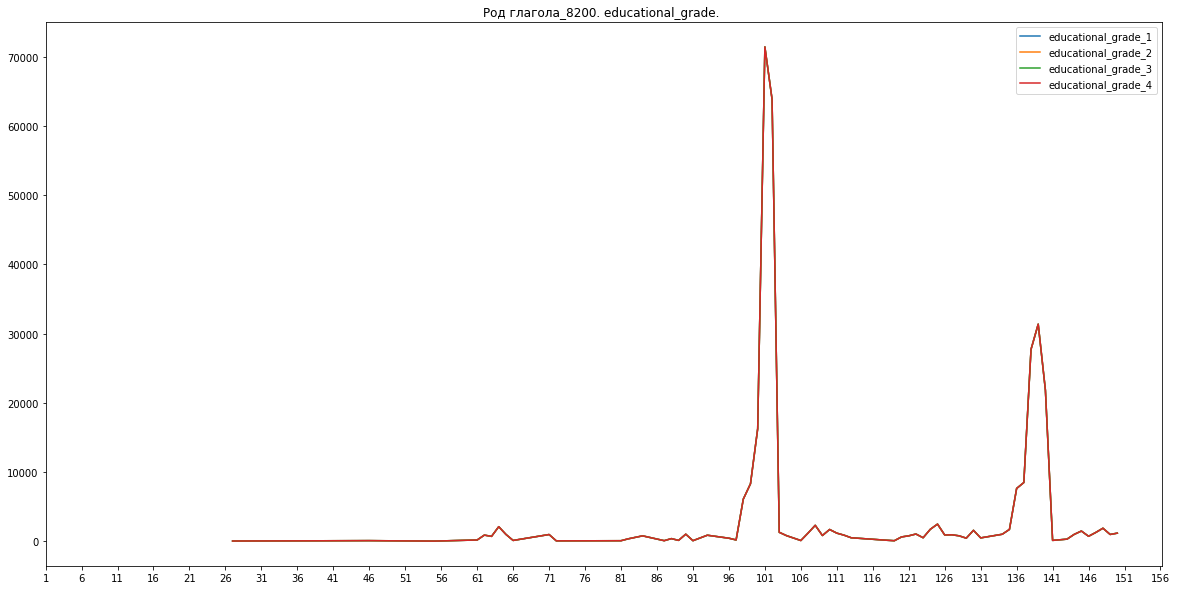

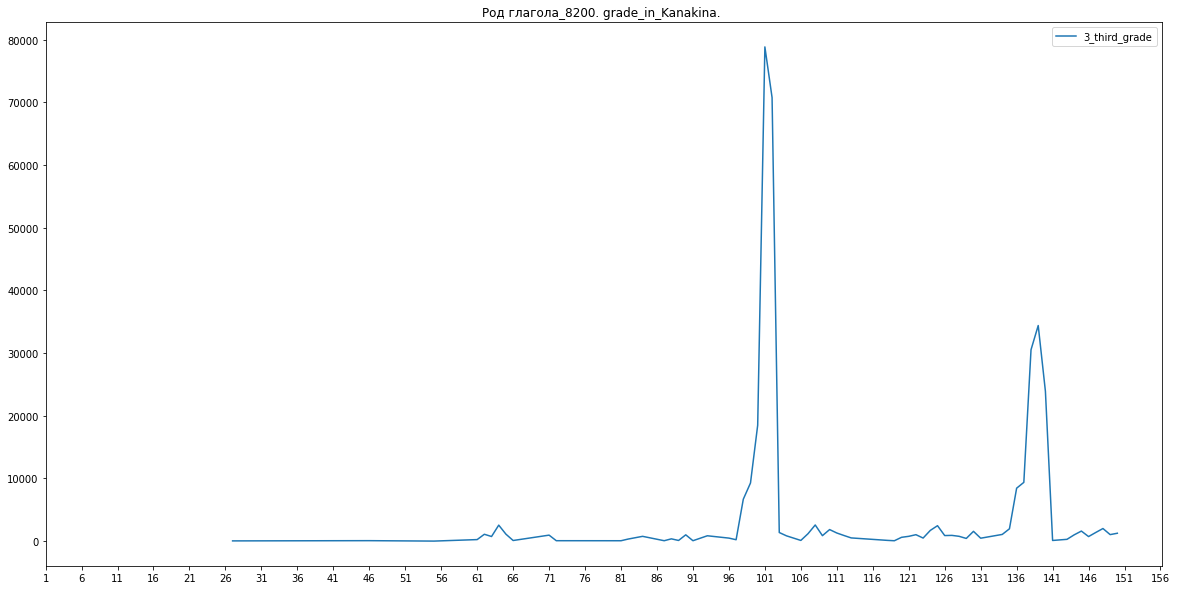

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

<Figure size 1440x720 with 0 Axes>

In [18]:
for theme in data['theme_name'].unique():
    data_theme = data[data['theme_name'] == theme]
    for attr in data['attribute_id'].unique():
        data_attr = data_theme[data_theme['attribute_id'] == attr]
        plt.figure(figsize=(20, 10))
        for val in data_attr['value_attribute_id'].unique():
            draw_df = data_attr[data_attr['value_attribute_id']  == val]
            plt.plot(draw_df['week_order'], draw_df['cnt'], label=val)
            plt.title(theme + '. ' + attr + '. ')
            plt.legend()
            plt.xticks(np.arange(data['week_order'].unique().min(), data['week_order'].unique().max(), 5))    
        plt.show()